<p align="right">David Rodríguez Elipe</p>

# Logistic Regression Concept
A logistic regression is a prediction algorithm that weigths input parameteres into a single output. It is used to predict a model with multiple input data and specific output values.

$$\displaystyle Y_{i}\ \sim B(p_{i},n_{i}),{\text{ for }}i=1,\dots ,m$$
![decision function](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.linear_model import LogisticRegression

<AxesSubplot:>

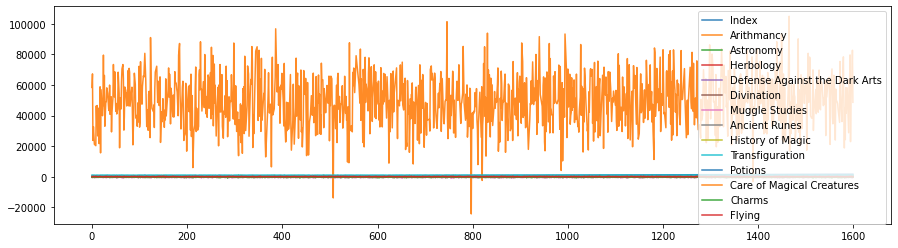

In [2]:
df = pd.read_csv('./datasets/dataset_train.csv')
df_bckp = df.copy()
df = df.dropna()
df.plot(figsize=(15,4), alpha=0.9)

# Data preprocessing
Non-numeric values need to be converted. Unnecessary features can be dropped.

In [3]:
df.iloc[0:,2:6]

,First Name,Last Name,Birthday,Best Hand
0,Tamara,Hsu,2000-03-30,Left
1,Erich,Paredes,1999-10-14,Right
2,Stephany,Braun,1999-11-03,Left
3,Vesta,Mcmichael,2000-08-19,Left
5,Corrine,Hammond,1999-04-04,Right
...,...,...,...,...
1595,Jung,Blank,2001-09-14,Right
1596,Shelli,Lock,1998-03-12,Left
1597,Benjamin,Christensen,1999-10-24,Right
1598,Charlotte,Dillon,2001-09-21,Left


In [4]:
def normalize(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

In [5]:
df

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
5,5,Slytherin,Corrine,Hammond,1999-04-04,Right,21209.0,-613.687160,-4.289197,6.136872,-6.592,-440.997704,396.201804,5.380286,1052.845164,11.751212,1.049894,-247.94549,-34.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1595,Gryffindor,Jung,Blank,2001-09-14,Right,49009.0,354.280086,-4.541837,-3.542801,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-0.649983,-250.39401,185.83
1596,1596,Slytherin,Shelli,Lock,1998-03-12,Left,63296.0,367.531174,6.061064,-3.675312,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-0.333962,-246.42719,44.80
1597,1597,Gryffindor,Benjamin,Christensen,1999-10-24,Right,63905.0,544.018925,-3.203269,-5.440189,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,0.071569,-251.63679,198.47
1598,1598,Hufflepuff,Charlotte,Dillon,2001-09-21,Left,82713.0,453.676219,3.442831,-4.536762,6.738,-831.741123,383.444937,3.813111,1087.949205,3.904100,-0.531875,-246.19072,-76.81


# Logistic Regression: applying it

In [6]:
from LogisticRegression import LogisticRegression as lr

In [7]:
houses = df['Hogwarts House'].unique()
houses

array(['Ravenclaw', 'Slytherin', 'Gryffindor', 'Hufflepuff'], dtype=object)

As we see, the date of birth doesn't seem to be a determining feature, so we can drop them.

In [8]:
df = df.drop(['Birthday','Best Hand','First Name','Last Name'], axis=1)

## Logistic Regression
Visualizing data

In [9]:
dicrav = {
    'Ravenclaw':1,
    'Slytherin':0,
    'Gryffindor':0,
    'Hufflepuff':0
}
dic2 = {
    0:'Ravenclaw',
    1:'Slytherin',
    2:'Gryffindor',
    3:'Hufflepuff'
}

In [10]:
y = np.array(df['Hogwarts House'].map(dicrav))
x = np.array(normalize(df.iloc[:,2:]))
ravenclaw = lr([1,1,1,1,1,1,1,1,1,1,1,1,1,1])
ravenclaw.theta

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
ravenclaw.theta.shape

(14,)

In [12]:
x.shape

(1251, 13)

In [13]:
y.shape

(1251,)

In [14]:
ravenclaw.theta.shape

(14,)

In [37]:
rav_theta = ravenclaw.fit(x,y)

<bound method NDFrame.head of Arithmancy                          58384
Astronomy                        -487.886
Herbology                         5.72718
Defense Against the Dark Arts     4.87886
Divination                          4.722
Muggle Studies                    272.036
Ancient Runes                     532.484
History of Magic                  5.23106
Transfiguration                   1039.79
Potions                           3.79037
Care of Magical Creatures        0.715939
Charms                           -232.794
Flying                             -26.89
Name: 0, dtype: object>

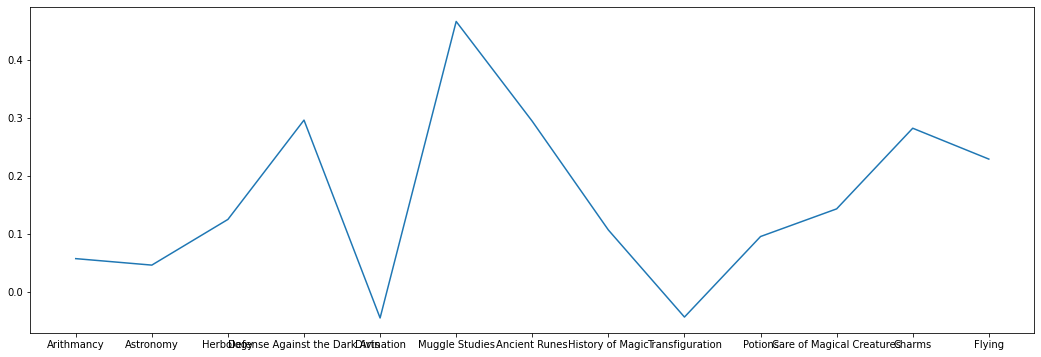

In [69]:
fig= plt.figure(figsize=(18,6))
plt.plot(list(df.iloc[:,2:].columns), rav_theta[1:])


In [21]:
ravenclaw_ypred = ravenclaw.predict(x)
ravenclaw_ypred.shape

(1251,)